In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import matplotlib as mpl
import iblofunmatch.inter as ibfm
output_dir="output"

from navground import sim, core

from perdiver.distances import *
import perdiver.perdiver as perdiver

EXECUTABLE_PATH: /home/atorras/repositories/navground-blofun/IBloFunMatch/build/IBloFunMatch


### Corridor trajectories experiment

Corridor experiment with points converging to horizontal trajectories going left and right.

In [4]:
length = 8.0
num_steps = 5000
width=1.1
yaml = f"""
steps: 3000
time_step: 0.1
save_directory: ''
record_pose: true
record_twist: true
scenario:
  type: Corridor
  length: {length}
  width: {width} 
  groups:
    -
      type: thymio
      number: 50
      radius: 0.08
      control_period: 0.1
      speed_tolerance: 0.02
      kinematics:
        type: 2WDiff
        wheel_axis: 0.094
        max_speed: 0.166
      behavior:
        type: HL
        optimal_speed: 0.12
        horizon: 5.0
        safety_margin: 0.2
      state_estimation:
        type: Bounded
        range: 5.0
"""
experiment = sim.load_experiment(yaml)
experiment.run()

In [5]:
run = experiment.runs[0]
ps = run.poses[:,:,[0,1]]
twists = run.twists[:,:,:2] # ignore angular speeds

In [6]:
weight = 5

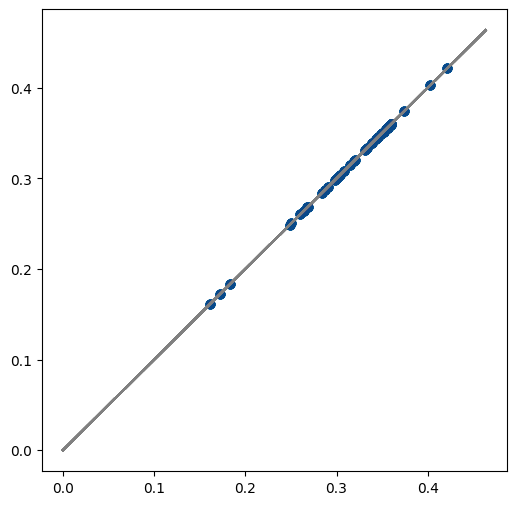

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
steplist = list(range(500,900, 10))
shift_time = 40
for idx, start_step in enumerate(steplist):
    Dist_X, Dist_Y, Dist_Z = compute_distance_matrices_trajectories_corridor(ps, twists, start_step, shift_time, weight, length)
    perdiver.plot_matching_diagram(Dist_X, Dist_Y, Dist_Z, ax, color=mpl.colormaps["GnBu"](idx/len(steplist)))


[[0.161588 0.161588]
 [0.172361 0.172361]
 [0.183236 0.183236]
 [0.248999 0.248999]
 [0.250274 0.250274]
 [0.260327 0.260327]
 [0.264018 0.264018]
 [0.267884 0.267884]
 [0.268712 0.268712]
 [0.283824 0.283824]
 [0.287141 0.287141]
 [0.290679 0.290679]
 [0.297845 0.297845]
 [0.299815 0.299815]
 [0.301084 0.301084]
 [0.303989 0.303989]
 [0.308069 0.308069]
 [0.31531  0.31531 ]
 [0.319151 0.319151]
 [0.320567 0.320567]
 [0.331247 0.331247]
 [0.333195 0.333195]
 [0.338939 0.338939]
 [0.338958 0.338958]
 [0.343473 0.343473]
 [0.345857 0.345857]
 [0.345957 0.345957]
 [0.348995 0.348995]
 [0.34967  0.34967 ]
 [0.351544 0.351544]
 [0.353967 0.353967]
 [0.354146 0.354146]
 [0.355532 0.355532]
 [0.355904 0.355904]
 [0.35603  0.35603 ]
 [0.356286 0.356286]
 [0.356359 0.356359]
 [0.357309 0.357309]
 [0.358619 0.358619]
 [0.35944  0.35944 ]
 [0.359537 0.359537]
 [0.359858 0.359858]
 [0.36     0.36    ]
 [0.36     0.36    ]
 [0.36     0.36    ]
 [0.360001 0.360001]
 [0.374099 0.374099]
 [0.402816 0.

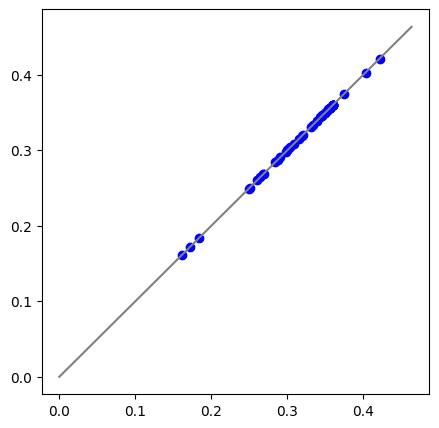

In [10]:
start_step=800
fig, ax = plt.subplots(figsize=(5, 5))
Dist_X, Dist_Y, Dist_Z = compute_distance_matrices_trajectories_corridor(ps, twists, start_step, shift_time, weight, length)
perdiver.plot_matching_diagram(Dist_X, Dist_Y, Dist_Z, ax, color="blue", print_barcode_n_reps=True)

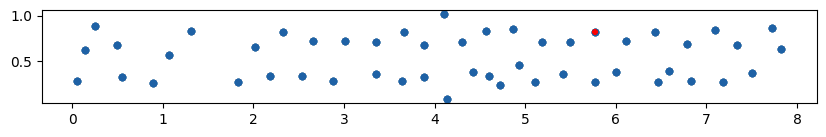

In [11]:
X_seq = ps[list(range(start_step, start_step+shift_time+1, 2))]
len(X_seq)
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_aspect("equal")
perdiver.plot_sequence(X_seq, ax, mark_points=[1])